In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

In [3]:
rets = pd.read_csv('returns_spx_v11.csv')
rets = rets.rename(columns={
    'Daily_Return': 'rets'
})
rets['Date'] = pd.to_datetime(rets['Date'])
rets = rets.set_index('Date')
with open('alphas_total.pkl', 'rb') as f:
    alpha = pkl.load(f)
rets = rets.iloc[-len(alpha):,:]
alphas = rets.copy()
alphas['rets'] = alpha

with open('exc_rets_total.pkl', 'rb') as f:
    exc_ret = pkl.load(f)
exc_rets = rets.copy()
exc_rets['rets'] = exc_ret

benchmark = pd.read_csv('returns_sp500.csv', index_col=0, parse_dates=True)
# benchmark = benchmark[(benchmark.index >= rets.index[0])&(benchmark.index <= rets.index[-1])]
benchmark = benchmark[benchmark.index.isin(rets.index)]

In [4]:
rets = pd.read_csv('returns_spx_v11.csv', index_col=0, parse_dates=True)
rets = rets.rename(columns={
    'Daily_Return': 'rets'
})
# rets = rets[(rets.index >= alphas.index[0])&(rets.index<=alphas.index[-1])]
benchmark = pd.read_csv('returns_sp500.csv', index_col=0, parse_dates=True)
benchmark = benchmark[(benchmark.index >= rets.index[0])&(benchmark.index <= rets.index[-1])]

Text(0, 0.5, 'Cumulative returns')

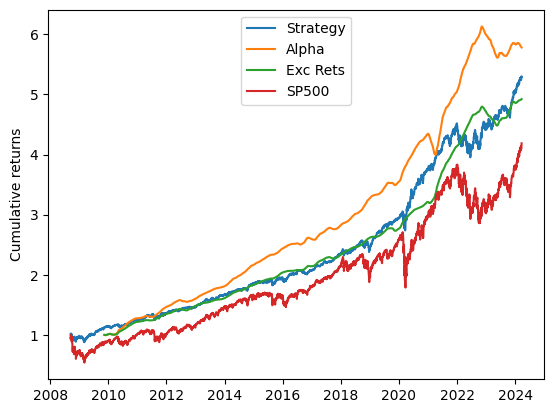

In [5]:
fig, ax1 = plt.subplots()
ax1.plot(rets.index, (1+rets['rets']).cumprod())
ax1.plot(alphas.index, (1+alphas['rets']).cumprod())
ax1.plot(exc_rets.index, (1+exc_rets['rets']).cumprod())
ax1.plot(benchmark.index, (1+benchmark['rets']).cumprod())
ax1.legend(['Strategy','Alpha', 'Exc Rets','SP500'], loc='upper center')
ax1.set_ylabel('Cumulative returns')

In [6]:
risk_free = pd.read_csv('Pairs_SP500_FPT/DTB6.csv', index_col=0, parse_dates=True)
risk_free = risk_free.rename(columns={
    'DTB6': 'rf'
})
risk_free['rf'] = pd.to_numeric(risk_free['rf'], errors='coerce')
risk_free = risk_free.dropna()
risk_free['rf'] = risk_free['rf']/100/365
risk_free = risk_free.reset_index().rename(columns={'DATE':'Date'}).set_index('Date')
risk_free = risk_free[risk_free.index.isin(rets.index)]

In [7]:
rets.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3875 entries, 0 to 3874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3875 non-null   datetime64[ns]
 1   rets    3875 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.7 KB


In [8]:
new_exc_rets = rets.copy().reset_index().merge(risk_free.reset_index(), left_on='Date', right_on='Date', how='left')
# new_exc_rets['rets'] = new_exc_rets['rets']-risk_free['rf']
new_exc_rets['rets'] -= new_exc_rets['rf']
new_exc_rets = new_exc_rets.set_index('Date')
new_exc_rets = new_exc_rets[['rets']]

Text(0, 0.5, 'Cumulative returns')

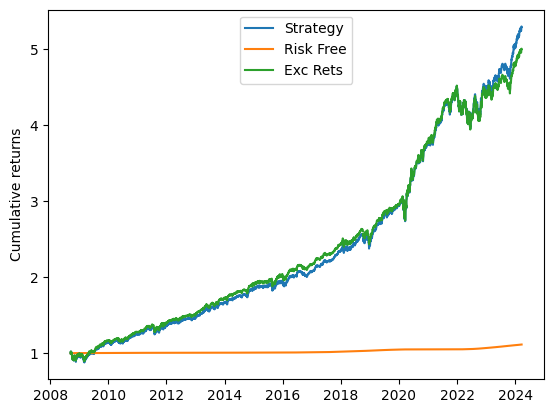

In [9]:
fig, ax1 = plt.subplots()
ax1.plot(rets.index, (1+rets['rets']).cumprod())
ax1.plot(risk_free.index, (1+risk_free['rf']).cumprod())
ax1.plot(new_exc_rets.index, (1+new_exc_rets['rets']).cumprod())
# ax1.plot(benchmark.index, (1+benchmark['rets']).cumprod())
ax1.legend(['Strategy','Risk Free', 'Exc Rets','SP500'], loc='upper center')
ax1.set_ylabel('Cumulative returns')

In [14]:
df = pd.read_excel('20240529/ratios.xlsx', index_col=0, parse_dates=True)
dates = pd.unique(df['date'])
dates_df = pd.DataFrame({'end':dates})
dates_df['start'] = dates_df['end'].shift(1)
dates_df = dates_df.dropna()
dates_df

,start,end
0,2000-02-29,NaT
1,2000-05-31,2000-02-29
2,2000-08-31,2000-05-31
3,2000-11-30,2000-08-31
4,2001-02-28,2000-11-30
...,...,...
287,2023-04-28,2023-01-31
288,2023-07-31,2023-04-28
289,2023-10-31,2023-07-31
290,2024-01-31,2023-10-31
